In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

In [2]:
import sys
sys.path.insert(0, './code/')
from dqn_agent import Agent

In [3]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
model_name = 'model/banana_raytracing_eds.pt'

In [5]:
agent = Agent()
agent.qnetwork_local.load_state_dict(torch.load(model_name))

In [6]:
#### PLAY THE GAME ####

In [7]:
trials=100
steps=2000

scores = [] 
brain_name = 'BananaBrain'
print('Start game...')
for i in range(trials):
    total_reward = 0
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0] 
    for j in range(steps):
        state = env_info.vector_observations[0] 
        action = agent.act(state)
        
        env_info = env.step(action)[brain_name]
        reward = env_info.rewards[0]  
        total_reward += reward
        
        done = env_info.local_done[0]
        if done:
            print("Total Reward:", total_reward)
            scores.append(total_reward)
            break

#        a = input("press enter")
#        if a=="stop":
#           break
#    if a=="stop":
#           break
print("Game Over")

Start game...
Total Reward: 13.0
Total Reward: 11.0
Total Reward: 15.0
Total Reward: 15.0
Total Reward: 20.0
Total Reward: 19.0
Total Reward: 18.0
Total Reward: 19.0
Total Reward: 10.0
Total Reward: 14.0
Total Reward: 12.0
Total Reward: 15.0
Total Reward: 12.0
Total Reward: 26.0
Total Reward: 17.0
Total Reward: 18.0
Total Reward: 20.0
Total Reward: 18.0
Total Reward: 10.0
Total Reward: 10.0
Total Reward: 18.0
Total Reward: 13.0
Total Reward: 19.0
Total Reward: 16.0
Total Reward: 19.0
Total Reward: 13.0
Total Reward: 14.0
Total Reward: 12.0
Total Reward: 19.0
Total Reward: 17.0
Total Reward: 20.0
Total Reward: 16.0
Total Reward: 16.0
Total Reward: 12.0
Total Reward: 18.0
Total Reward: 16.0
Total Reward: 12.0
Total Reward: 20.0
Total Reward: 20.0
Total Reward: 4.0
Total Reward: 17.0
Total Reward: 15.0
Total Reward: 6.0
Total Reward: 15.0
Total Reward: 16.0
Total Reward: 23.0
Total Reward: 13.0
Total Reward: 13.0
Total Reward: 17.0
Total Reward: 15.0
Total Reward: 16.0
Total Reward: 14.0


In [11]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.

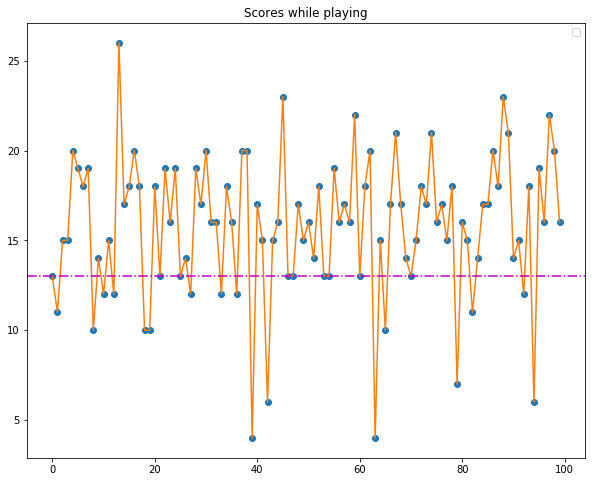

In [10]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(scores, "o")
plt.plot(scores)
plt.axhline(y=13, color='m', linestyle='-.')
plt.title("Scores while playing")
plt.legend()
plt.show() 